In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

In [103]:
#utility functions
def make_homo(X):
    #[x,y...]->[w,y,....,1]
    return np.hstack((X,np.ones((X.shape[0],1))))

def make_norm_mat(means,std):
    diags = np.sqrt(len(means))*np.diag(1/std)
    col = np.sqrt(len(means))*np.array(-means/std).reshape(-1,1)
    F = np.hstack((np.vstack((diags,np.zeros((1,diags.shape[1]))))\
                ,np.vstack((col,np.array([1])))))
    return F

# Image Registration
In this section we map 3D World cordinate to 2D image cordinates. 

## 3D World frame
This Axis used for 3D system is as follows:<br>
![3d image axis](data/3d.png)

## 2D Image frame
This image axis mapped in 2D image is as follows: <br>
![2d image axis](data/2d.png)

## Mapping 3D -> to 2D
We select random points in 3D world frame and map corresponding points in 2D image using pixel locations of those points in 2D image. 

In [129]:
points_3d = np.array([[100,0,0],
         [75,0,25],
         [0,25,50],
         [0,75,75],
         [0,50,100],
         [25,0,175],
         [0,25,125],
         [25,0,125],
         [75,0,200]])
        
points_2d = np.array([[135,137],
         [159,169],
         [283,191],
         [359,253],
         [323,296],
         [209,442],
         [283,340],
         [211,343],
         [159,493]])

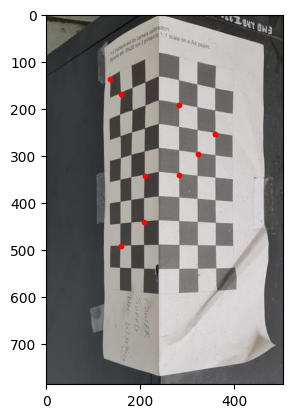

In [130]:
img = mpimg.imread('data/img.jpeg')
  
# Output Images
plt.imshow(img)
for i in range(points_2d.shape[0]):
    plt.scatter(points_2d[i][0], points_2d[i][1], s=10,c='red')
plt.show()

# Points Normalization
Normalize the data such that the centroid of 2D and 3D points are at origin and the
average Euclidean distance of 2D and 3D points from the origin is $\sqrt{2}$ and $\sqrt{3}$,
respectively. Find the transformation matrices $T$ and $U$ that achieve this for 2D and 3D
respectively, i.e, $\hat x = Tx$ and $\hat X = UX$ where $x$ and $X$ are the unnormalized 2D and 3D
points in homogeneous coordinates.

## 2D Normalization
As you can see the transformation matrix shifts every point in 2D by the mean value, in each dimension, which result in zero mean. Zero mean in every dimesion implies that the centroid has been shifted to origin. Also, it scales every point in 2D by $\sqrt{2}\over\sigma$ for each dimension, which makes the standard deviation (or average euclidean distance) equals to $\sqrt{2}$.<br>

The Translation matrix $T$ is created as follows
$$T = \begin{bmatrix} \sqrt{2}\over\sigma_x & 0 & -\sqrt{2}\mu_x\over\sigma_x \\ 
                      0 & \sqrt{2}\over\sigma_y & -\sqrt{2}\mu_y\over\sigma_y  \\
                      0 & 0 & 1\end{bmatrix}$$
                      
The new normalized points are given by application of this transformation matrix
$$\hat x = Tx$$

In [131]:
T = make_norm_mat(np.mean(points_2d, axis=0),np.std(points_2d,axis=0))
points_2d_norm_homo = np.matmul(T,make_homo(points_2d).T).T
points_2d_norm = points_2d_norm_homo[:,:2]
print('T :\n')
print(T)

print('\n\n After Normalization:\n')
print(points_2d_norm)
print(np.mean(points_2d_norm,axis=0))

T :

[[ 0.01887427  0.         -4.44803665]
 [ 0.          0.01232191 -3.64728632]
 [ 0.          0.          1.        ]]


 After Normalization:

[[-1.90001000e+00 -1.95918421e+00]
 [-1.44702748e+00 -1.56488298e+00]
 [ 8.93382185e-01 -1.29380089e+00]
 [ 2.32782682e+00 -5.29842270e-01]
 [ 1.64835305e+00 -4.44089210e-16]
 [-5.03313907e-01  1.79899933e+00]
 [ 8.93382185e-01  5.42164183e-01]
 [-4.65565364e-01  5.79129923e-01]
 [-1.44702748e+00  2.42741691e+00]]
[-4.44089210e-16 -6.41462192e-16]


## 3D Normalization
As you can see the transformation matrix shifts every point in 3D by the mean value, in each dimension, which result in zero mean. Zero mean in every dimesion implies that the centroid has been shifted to origin. Also, it scales every point in 3D by $\sqrt{3}\over\sigma$ for each dimension, which makes the standard deviation (or average euclidean distance) equals to $\sqrt{3}$.<br>

The Translation matrix $U$ is created as follows
$$U = \begin{bmatrix} \sqrt{3}\over\sigma_x & 0 & -\sqrt{3}\mu_x\over\sigma_x \\ 
                      0 & \sqrt{3}\over\sigma_y & -\sqrt{3}\mu_y\over\sigma_y  \\
                      0 & 0 & 1\end{bmatrix}$$
                      
The new normalized points are given by application of this transformation matrix
$$\hat X = UX$$

In [132]:
U = make_norm_mat(np.mean(points_3d, axis=0), np.std(points_3d,axis=0))
        
points_3d_norm_homo = np.matmul(U,make_homo(points_3d).T).T
points_3d_norm = points_3d_norm_homo[:,:3]


print('U :\n')
print(U)

print('\n\n After Normalization: \n')
print(points_3d_norm)

U :

[[ 0.0464758   0.          0.         -1.54919334]
 [ 0.          0.06723786  0.         -1.30740289]
 [ 0.          0.          0.02755676 -2.67912941]
 [ 0.          0.          0.          1.        ]]


 After Normalization: 

[[ 3.09838668 -1.30740289 -2.67912941]
 [ 1.93649167 -1.30740289 -1.99021042]
 [-1.54919334  0.37354368 -1.30129143]
 [-1.54919334  3.73543684 -0.61237244]
 [-1.54919334  2.05449026  0.07654655]
 [-0.38729833 -1.30740289  2.14330352]
 [-1.54919334  0.37354368  0.76546554]
 [-0.38729833 -1.30740289  0.76546554]
 [ 1.93649167 -1.30740289  2.83222252]]


# Estimation of projection matrix $P$

* Estimate the normalized projection matrix $\hat P$ using the DLT method. 
* Denormalize the projection matrix $\hat P. (P = T^{-1}\hat PU)$.

## The pattern Matrix
As mentioned in forsyth and ponce, The patter matrix _P_ is calculated as follows:<br>
_P_ = $\begin{bmatrix}
\bf P_{1}^T & \bf 0^T & -x_{1}\bf P_{1}^T\\
\bf 0^T & \bf P_{1}^T & -y_{1}\bf P_{1}^T\\
... & ... & ...\\
\bf P_{n}^T & \bf 0^T & -x_{n}\bf P_{n}^T\\
\bf 0^T & \bf P_{n}^T & -y_{n}\bf P_{n}^T
\end{bmatrix}$

In [133]:
P_1 = np.hstack((points_3d_norm_homo,np.zeros_like(points_3d_norm_homo),-points_2d_norm[:,0][:,np.newaxis]*points_3d_norm_homo))
P_2 = np.hstack((np.zeros_like(points_3d_norm_homo),points_3d_norm_homo,-points_2d_norm[:,1][:,np.newaxis]*points_3d_norm_homo))
P = np.zeros((P_1.shape[0]*2,P_1.shape[1]))
P[0::2,:] = P_1
P[1::2,:] = P_2

## DLT Method
Here, the $P^{T}P$ matrix has been calculated and the eigen vector correspoding to the minimum eigen value has been retrieved and reshaped into a 3 $\times$ 4 matrix, which gives the projection matrix corresponding to normalized coordinate system.


In [134]:
u,w = np.linalg.eig(np.matmul(P.T,P))
P_norm = w[:,np.argmin(u)].reshape(3,4)
print(f'Normalized Projection Matrix:\n {P_norm}')


Normalized Projection Matrix:
 [[ 0.30508165 -0.31990536  0.00183518  0.00970117]
 [-0.05629351 -0.02277517 -0.57961126  0.01247356]
 [-0.02185318 -0.01724836 -0.00129881 -0.68111603]]


## Denormalizing the projection matrix

In [135]:
P_unorm = np.matmul(np.linalg.inv(T),(np.matmul(P_norm,U)))
print(f'Denormalized Projection Matrix:\n {P_unorm}')

Denormalized Projection Matrix:
 [[ 5.11876285e-01 -1.41294621e+00 -5.75535851e-03 -1.49031395e+02]
 [-5.12958502e-01 -4.67562697e-01 -1.30683829e+00 -4.73542019e+01]
 [-1.01564400e-03 -1.15974255e-03 -3.57910054e-05 -6.21231001e-01]]


## Decomposing Projection matrix into $K$,$R$ and $t$
Decompose the projection matrix _P_$ = K\begin{bmatrix} R & | & -RX_o \end{bmatrix}$ into intrinsic matrix K, rotation matrix $R$ and the camera center $X_o$. $K$ and $R$ can be estimated using $RQ$ decomposition.

In [136]:
M = P_unorm[:3,:3]
R,K= np.linalg.qr(M)
t = np.matmul(np.linalg.inv(K),P_unorm[:,-1])
X_o = -np.matmul(np.linalg.inv(R),t)
print(f'K = \n {K} \n\n R = \n {R} \n\n and X_o = \n{X_o} \n')

K = 
 [[-0.72466874  0.66708027 -0.92098331]
 [ 0.          1.33042742  0.92716871]
 [ 0.          0.          0.00271477]] 

 R = 
 [[-7.06358995e-01 -7.07853767e-01 -1.24489337e-04]
 [ 7.07852390e-01 -7.06357251e-01 -2.10419532e-03]
 [ 1.40152864e-03 -1.57443737e-03  9.99997778e-01]] 

 and X_o = 
[343.8750505  519.29897794 229.17003282] 



## Calculating the RMSE error between actual and projected points

In [137]:
pred = np.dot(P_unorm, make_homo(points_3d).T) 
pred = pred / pred[2, :] 
pred=pred[0:2, :].T
    
print('Calculated 2D Coordinates with help of Projection matrix: \n')
print(pred)
err = np.sqrt( np.mean(np.sum( (pred - points_2d)**2, 1)) )
print('\n\n RMSE error between Calcualted and actual 2D points: {}'.format(err))

Calculated 2D Coordinates with help of Projection matrix: 

[[135.36855221 136.48406179]
 [158.64915458 169.69383319]
 [283.1883764  190.77069211]
 [359.31276395 253.81247283]
 [322.57635559 294.98679476]
 [210.2078702  442.45867597]
 [282.68659138 339.69541126]
 [210.34365606 343.31797331]
 [158.66831613 492.77920315]]


 RMSE error between Calcualted and actual 2D points: 0.7894846234562357


# Plotting projected points

* Since the RMSE is very low, points mostly overlap.
* On closer inspection you can find points $1$,$3$, and $4$ not completely overlapping. You can see a blue tint behind the red crosses.

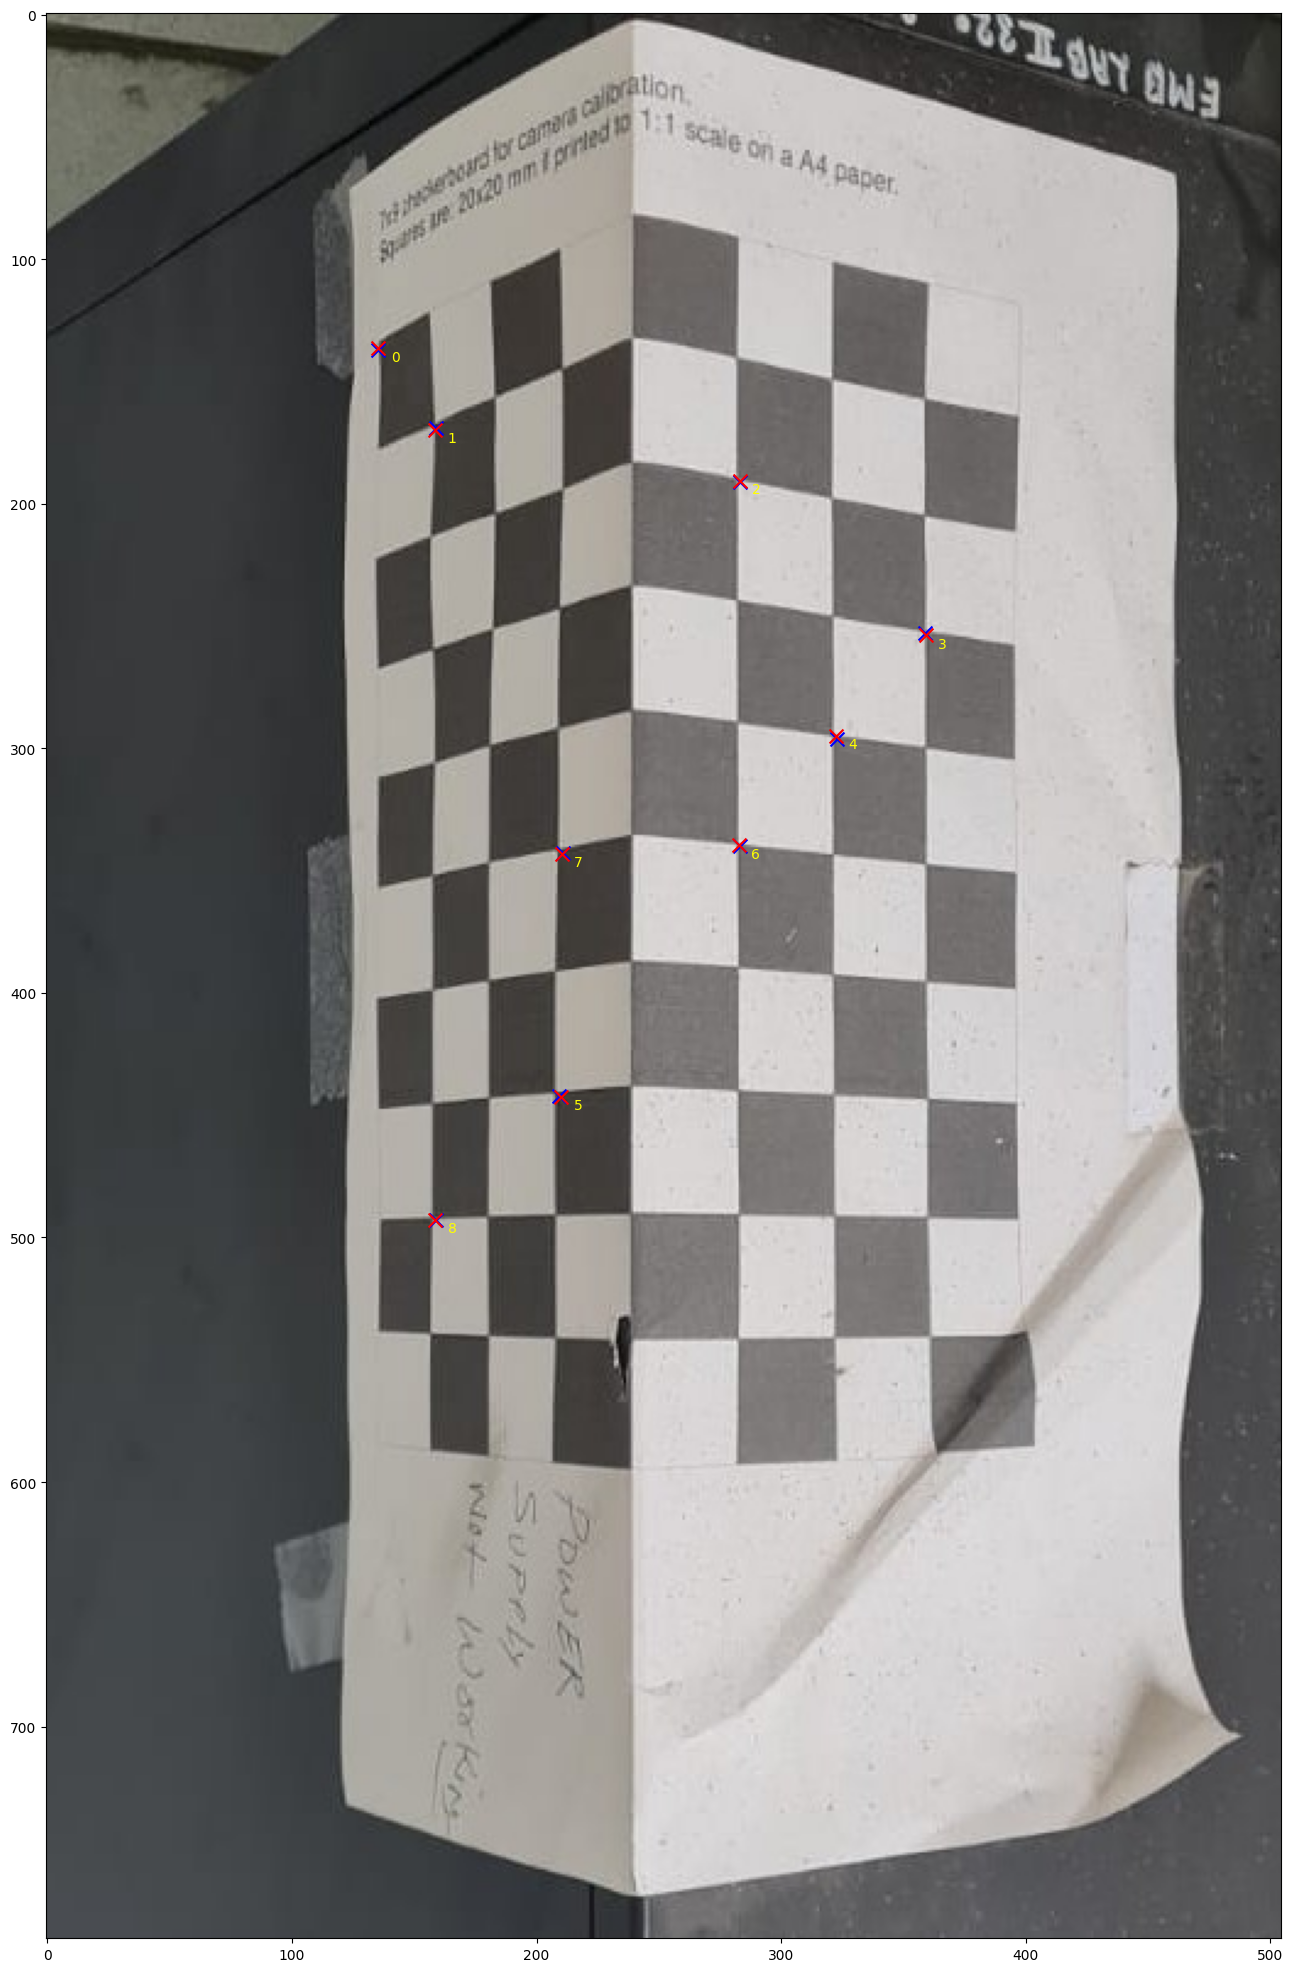

In [138]:
plt.figure( figsize=(25,25))
plt.imshow(img)
for i in range(points_2d.shape[0]):
    plt.scatter(points_2d[i][0], points_2d[i][1], s=100,c='blue',marker='x')
    plt.scatter(pred[i][0], pred[i][1], s=100,c='red',marker='x')
    plt.annotate(str(i), xy=(pred[i][0]+5, pred[i][1]+5), xycoords='data',fontsize= 10, color='yellow')
plt.show()

# Un Normalized Points

In [139]:
points_3d_homo = make_homo(points_3d)
P_1 = np.hstack((points_3d_homo,np.zeros_like(points_3d_homo),-points_2d[:,0][:,np.newaxis]*points_3d_homo))
P_2 = np.hstack((np.zeros_like(points_3d_homo),points_3d_homo,-points_2d[:,1][:,np.newaxis]*points_3d_homo))
P = np.zeros((P_1.shape[0]*2,P_1.shape[1]))
P[0::2,:] = P_1
P[1::2,:] = P_2

u,w = np.linalg.eig(np.matmul(P.T,P))
P = w[:,np.argmin(u)].reshape(3,4)

pred = np.dot(P, points_3d_homo.T) 
pred = pred / pred[2, :] 
pred=pred[0:2, :].T
    
print('Calculated 2D Coordinates with help of Projection matrix: \n')
print(pred)
err = np.sqrt( np.mean(np.sum( (pred - points_2d)**2, 1)) )
print('\n\n RMSE error between Calcualted and actual 2D points: {}'.format(err))

Calculated 2D Coordinates with help of Projection matrix: 

[[135.38220404 136.51282537]
 [158.71010339 169.70762468]
 [282.96115697 190.77891114]
 [359.45709973 253.63934804]
 [322.48629577 295.15394792]
 [210.39465819 442.36756004]
 [282.62790779 339.91102247]
 [210.52909361 343.12231946]
 [158.4773038  492.8134123 ]]


 RMSE error between Calcualted and actual 2D points: 0.7736828023850508


# Radial Distortion
The Radial distortion in camera calibration is calculated as follows:
* _E\_norm_ function takes vectors in the form $\begin{bmatrix} 

In [170]:
from scipy.optimize import least_squares
fudicial_points = 9
N = fudicial_points
def E_norm(eta,*args,**kwargs):
    
    residual = []
    
    for i in range(N):
        
        x = points_2d_norm[i][0]
        y = points_2d_norm[i][1]
        P = points_3d_norm_homo[i,:]
        
        
        d = (x**2 + y**2)
        d = np.array([d,d**2,d**3])
                     
        eta1 = eta[:4]
        eta2 = eta[4:8]
        eta3 = eta[8:12]
        q = eta[12:15]
                     
        lamb = 1 + np.dot(q,d)
                     
        f1 = (x - np.dot(eta1,P)/lamb/np.dot(eta3,P))**2 
        f2 = (y - np.dot(eta2,P)/lamb/np.dot(eta3,P))**2
        residual.append(f1)
        residual.append(f2)
    residual = np.array(residual)
    return residual

res = least_squares(E_norm, np.hstack((P_norm.reshape(-1,),np.array([0,0,0]))),method='lm',)
M_norm = res.x[:12].reshape(3,4)

# New Projections
Predicted values using new projection matrix using.


In [181]:
pred_vals = []
M_unorm = np.matmul(np.linalg.inv(T),np.matmul((M_norm,U)))
x_cap = np.matmul(res.x[:12].reshape(3,4),points_3d_norm_homo.T)
x_cap = (x_cap/x_cap[2,:]).T
for i in range(N):    
        x = x_cap[i][0]
        y = x_cap[i][1]
        P = points_3d_homo[i,:]
        
        
        d = (x**2 + y**2)
        d = np.array([d,d**2,d**3])
                     
        eta1 = M_unorm[0,:]
        eta2 = M_unorm[1,:]
        eta3 = M_unorm[2,:]
        q = res.x[12:15]
                     
        lamb = 1 + np.dot(q,d)           
        pred_vals.append([np.dot(eta1,P)/lamb/np.dot(eta3,P) ,np.dot(eta2,P)/lamb/np.dot(eta3,P)])

pred_vals = np.array(pred)

    
print('Calculated 2D Coordinates with help of Projection matrix(including Radial Distortion): \n')
print(pred_vals)
print(f'RMSE error between Calcualted and actual 2D points: {np.sqrt( np.mean(np.sum( (pred_vals - points_2d)**2, 1)))}')

Calculated 2D Coordinates with help of Projection matrix(including Radial Distortion): 

[[136.83759371 138.1807214 ]
 [161.64397054 173.45201074]
 [288.56516523 197.07057521]
 [360.98136206 255.81309504]
 [328.29424115 301.39638967]
 [214.28282245 448.35074649]
 [285.91124459 344.39672396]
 [212.57267081 346.23402721]
 [160.56767806 494.74966342]]


 RMSE error between Calcualted and actual 2D points: 5.606464263445021
